In [10]:
import cell_movie_maker as cmm
import chaste_simulation_database_connector as csdc
import matplotlib.pyplot as plt
import numpy as np
import pathlib


from IPython.display import display
import IPython.display


cmm.Config.simulations_folder = pathlib.Path("chaste_output").resolve()
cmm.Config.output_folder = pathlib.Path("analysis_output").resolve()
cmm.Config.set_simulation_database(pathlib.Path("analysis_output", "TCellABM.db"))

experiment = cmm.Experiment(pathlib.Path("chaste_output", "TCellABM"))
simulation = experiment.simulations[0]
sample_timepoint = simulation.timepoints[50]


In [11]:
class TCellABMPopulationsVisualiser(cmm.SimulationVisualiser):
    def __init__(self, visualisation_name='trajectories', **kwargs):
        super().__init__(visualisation_name=visualisation_name, **kwargs)
        self.plotter_config = cmm.plotters.TimepointPlotter.Config()

    def visualise_frame(self, sim:cmm.Simulation, tp:cmm.SimulationTimepoint, frame_num:int):
        fig, axs = plt.subplot_mosaic("AAAB;AAAC", figsize=(10,6), gridspec_kw=dict())

        cmm.plotters.TimepointPlotter().plot(axs["A"], tp, frame_num, tp.timestep, sim=sim, config=self.plotter_config)
        cmm.plotters.TumourDamageCountPlotter().plot(axs["B"], tp, frame_num, tp.timestep, sim=sim)
        cmm.plotters.TCellExhaustionCountPlotter().plot(axs["C"], tp, frame_num, tp.timestep, sim=sim)
        fig.tight_layout()
        return fig, axs

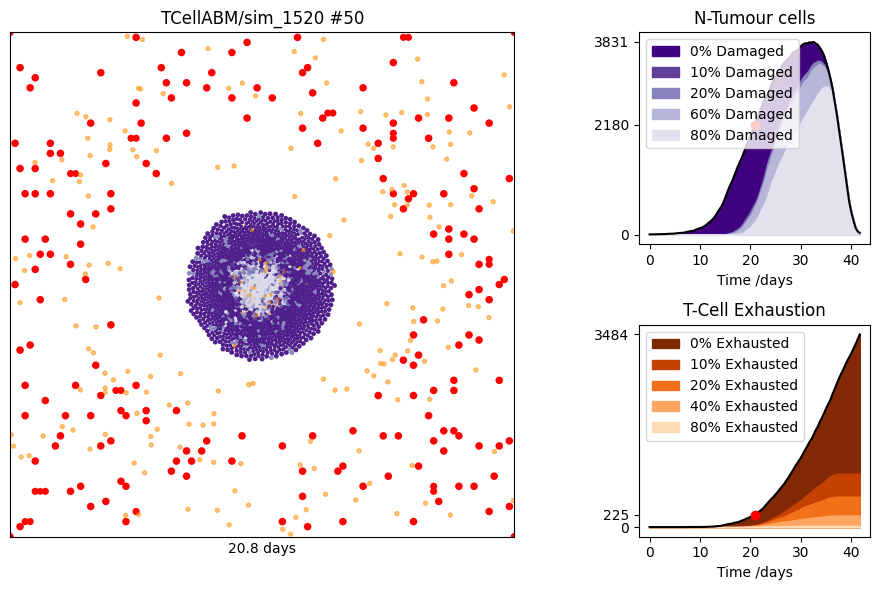

In [12]:
visualiser = TCellABMPopulationsVisualiser('exhaustion', output_parent_folder=cmm.Config.output_folder)
fig, ax = visualiser.visualise_frame(simulation, sample_timepoint, 50)
plt.show(fig)

In [13]:
visualiser.visualise(simulation)
visualiser.create_ffcat(simulation, framerate=5)
visualiser.generate_mp4_from_ffcat(simulation, framerate=5)

100%|██████████| 101/101 [00:19<00:00,  5.22it/s]


/home/fann/Code/cell-movie-maker/examples/analysis_output/TCellABM/sim_1520/exhaustion.ffcat


Video can be found in `analysis_output/TCellABM/sim_1520/exhaustion.mp4`